# 다중 분류 
- 사용 데이터: Iris

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

1. 데이터 전처리

In [3]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [4]:
iris = load_iris()
iris_std = StandardScaler().fit_transform(iris.data) # X - 정규화
y_onehot = to_categorical(iris.target)               # Y - 원핫인코딩

X_train, X_test, Y_train, Y_test = train_test_split(
    iris_std, y_onehot, stratify=y_onehot ,test_size=0.2, random_state=seed
)

2. 모델 정의/설정/학습/평가

In [5]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [6]:
model = Sequential([
                    Dense(12, input_dim=4, activation='relu'),
                    Dense(8, activation='relu'),
                    Dense(3, activation='softmax') # 다중분류니까 출력: 3개, 활성화함수: softmax
])

In [7]:
model.compile('adam', 'categorical_crossentropy', ['accuracy']) # 'categorical_crossentropy' 

In [8]:
mc = ModelCheckpoint('iirs3_best.h5', monitor='val_loss', verbose=1, save_best_only=True)

es = EarlyStopping(patience=30)

In [9]:
hist = model.fit(X_train, Y_train, validation_split=0.2,
                 epochs=1000, batch_size=100, verbose=0,
                 callbacks=[mc,es])


Epoch 1: val_loss improved from inf to 1.22967, saving model to iirs3_best.h5

Epoch 2: val_loss improved from 1.22967 to 1.22161, saving model to iirs3_best.h5

Epoch 3: val_loss improved from 1.22161 to 1.21356, saving model to iirs3_best.h5

Epoch 4: val_loss improved from 1.21356 to 1.20554, saving model to iirs3_best.h5

Epoch 5: val_loss improved from 1.20554 to 1.19754, saving model to iirs3_best.h5

Epoch 6: val_loss improved from 1.19754 to 1.18948, saving model to iirs3_best.h5

Epoch 7: val_loss improved from 1.18948 to 1.18150, saving model to iirs3_best.h5

Epoch 8: val_loss improved from 1.18150 to 1.17360, saving model to iirs3_best.h5

Epoch 9: val_loss improved from 1.17360 to 1.16575, saving model to iirs3_best.h5

Epoch 10: val_loss improved from 1.16575 to 1.15808, saving model to iirs3_best.h5

Epoch 11: val_loss improved from 1.15808 to 1.15050, saving model to iirs3_best.h5

Epoch 12: val_loss improved from 1.15050 to 1.14297, saving model to iirs3_best.h5

Epoc

In [10]:
model.evaluate(X_test, Y_test)

1/1 [==============================] - 0s 21ms/step - loss: 0.1612 - accuracy: 0.9000


[0.16116997599601746, 0.8999999761581421]

In [10]:
best_model = load_model('iris_best.h5')
best_model.evaluate(X_test, Y_test)

In [11]:
y_acc = hist.history['accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc)+1)

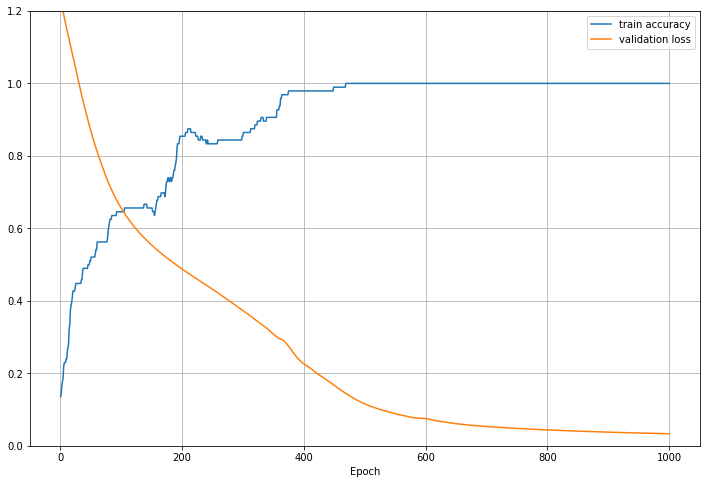

In [12]:
plt.figure(figsize=(12,8))
plt.plot(xs, y_acc, label='train accuracy')
plt.plot(xs, y_vloss, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.show()